# This project consist of applying Dyson sphere models to stars in the Milky Way. For the purpose of this course I am optimizing the time it takes by cythonizing the functions I used for the models

In [1]:
import time
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functions.normal.BB as BB
import functions.cython.BB as c_BB

from astropy.table import Table

In [2]:
#Latex font
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':23})
rc('text', usetex=True)

In [3]:
#Loading stars data
file1 = '/Users/matias/Documents/Data/_10-result.fits.gz'

dat = Table.read(file1,format='fits')
df = dat.to_pandas()

print('Number of stars = ',len(df))

Number of stars =  268570


In [4]:
#Data that I need for the models
df['dist'] = 1000./df['parallax']

#calculating absolute magnitude
df['g_abs'] = df['phot_g_mean_mag'] - 5*np.log10(df['dist']/10)
df['w1_abs'] = df['w1mpro'] - 5*np.log10(df['dist']/10)
df['w2_abs'] = df['w2mpro'] - 5*np.log10(df['dist']/10)
df['w3_abs'] = df['w3mpro'] - 5*np.log10(df['dist']/10)
df['w4_abs'] = df['w4mpro'] - 5*np.log10(df['dist']/10)

#creating colors
df['g_w1'] = df['phot_g_mean_mag'] - df['w1mpro']
df['g_w2'] = df['phot_g_mean_mag'] - df['w2mpro']
df['g_w3'] = df['phot_g_mean_mag'] - df['w3mpro']
df['g_w4'] = df['phot_g_mean_mag'] - df['w4mpro']

In [5]:
#I need luminosities

#Stars with luminosities
df_yes = df.dropna(subset=['lum_val'])
df_yes = df_yes.reset_index(drop=True)
print('All yes stars with luminosities = ',len(df_yes))

#Stars without luminosities
df_no = df[df['lum_val'].isnull()]
df_no = df_no.reset_index(drop=True)
print('All no stars with luminosities = ',len(df_no))

All yes stars with luminosities =  57846
All no stars with luminosities =  210724


In [6]:
#I estimate luminosities for the missing ones
df_no['lum_val'] = 10**(-4.98050389e-04*df_no['g_abs']**3 + 1.64079645e-02*df_no['g_abs']**2 -4.87229162e-01*df_no['g_abs'] + 1.98621692e+00)

In [7]:
#Final dataframe before applying models
frames = [df_yes,df_no]
df_count= pd.concat(frames)

In [8]:
tt = 100
ee = 5e-1

In [9]:
%timeit BB.W4_DS(np.array(df_count['w4_abs']),tt,np.array(df_count['lum_val']),ee)

5.26 s ± 136 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit c_BB.W4_DS(np.array(df_count['w4_abs']),tt,np.array(df_count['lum_val']),ee)

4.96 s ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
w4dstop_n = BB.W4_DS(np.array(df_count['w4_abs']),tt,np.array(df_count['lum_val']),ee)
w4dstop_c = c_BB.W4_DS(np.array(df_count['w4_abs']),tt,np.array(df_count['lum_val']),ee)
gdstop = np.array(df_count['phot_g_mean_mag']) - 2.5*np.log10(1 - ee)
Gdstop = gdstop - 5*np.log10(df_count['dist']/10.)

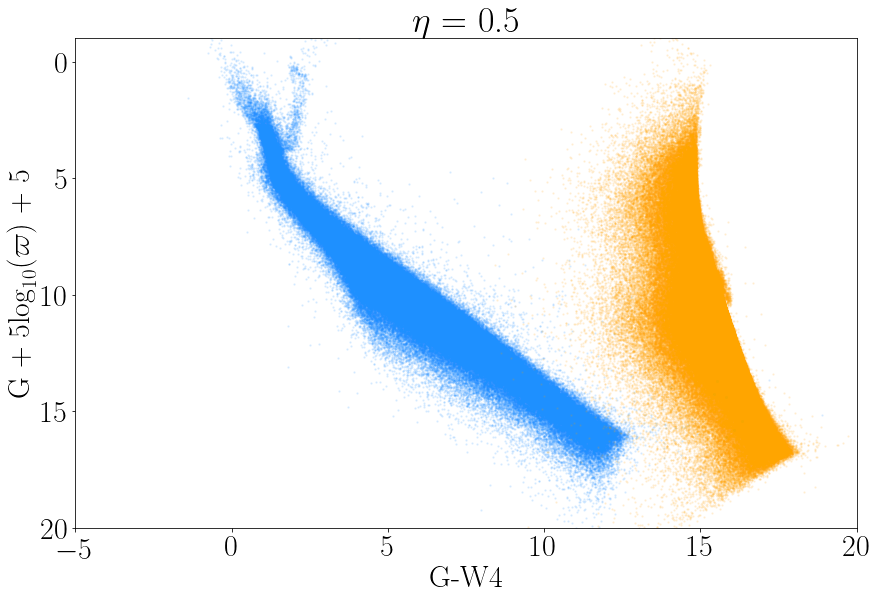

In [12]:
#Plotting results
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(14,9))
plt.scatter(df_count['g_w4'],df_count['g_abs'],alpha=0.1,c='dodgerblue',s=2)
plt.scatter(gdstop-w4dstop_n,Gdstop,alpha=0.1,c='orange',s=2)
plt.xlabel('G-W4')
plt.ylabel(r'G + 5$\log_{10}$($\varpi$) + 5')
plt.ylim(20,-1)
plt.xlim(-5,20)
plt.title(r'$\eta$ = '+str(ee))
plt.show()
plt.close()

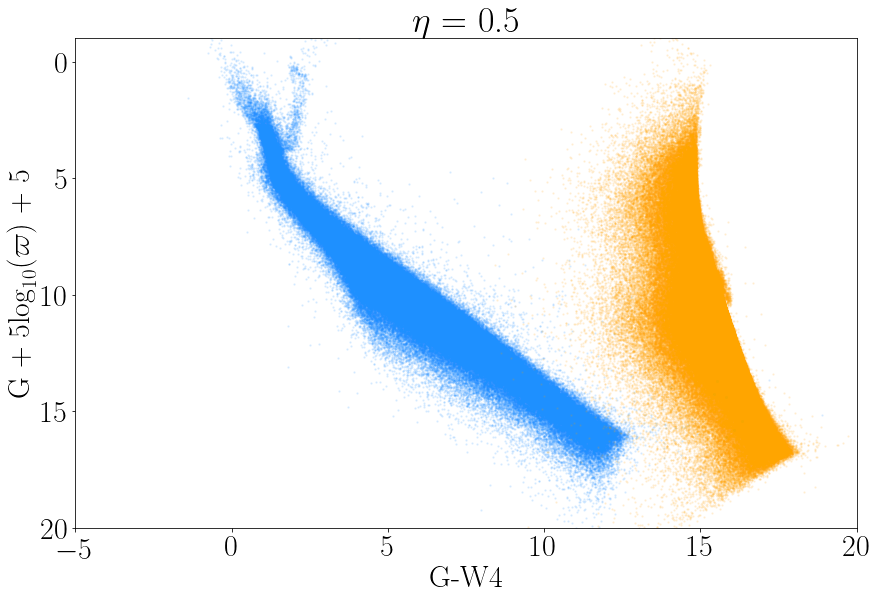

In [13]:
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(14,9))
plt.scatter(df_count['g_w4'],df_count['g_abs'],alpha=0.1,c='dodgerblue',s=2)
plt.scatter(gdstop-w4dstop_c,Gdstop,alpha=0.1,c='orange',s=2)
plt.xlabel('G-W4')
plt.ylabel(r'G + 5$\log_{10}$($\varpi$) + 5')
plt.ylim(20,-1)
plt.xlim(-5,20)
plt.title(r'$\eta$ = '+str(ee))
plt.show()
plt.close()